<a href="https://colab.research.google.com/github/lingchm/datascience-projects/blob/master/P9_Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

Link: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement

**Data Dictionary**

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

**Evaluation Metric**

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual sales for the test dataset, against which your predictions will be evaluated. We will use the Root Mean Square Error value to judge your response.

**Public and Private Split**
Test file is further divided into Public (25%) and Private (75%)
* Your initial responses will be checked and scored on the Public data.
* The final rankings would be based on your private score which will be published once the competition is over.

**Guidelines for Final Submission**

Please ensure that your final submission includes the following:
* Solution file containing the predicted sales value in the test dataset (format is given in sample submission csv)
* Code file for reproducing the submission, note that it is mandatory to submit your code for a valid final submission



## Linear Regression

In [42]:
# importing basic libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [24]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# import data
train = pd.read_csv('/content/drive/Shared drives/Summer 2020/LaiOffer/Python Notebooks/Projects/data/BigMart/train_v9rqX0R.csv')
test = pd.read_csv('/content/drive/Shared drives/Summer 2020/LaiOffer/Python Notebooks/Projects/data/BigMart/test_AbJTz2l.csv')

In [57]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Model 1: Linear regression with two variables

In [56]:
# importing linear regressionfrom sklearn
lreg = LinearRegression()

# splitting into training and cv for cross validation
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

# training the model
lreg.fit(x_train, y_train)

# predicting on cv
pred = lreg.predict(x_cv)

# calculating mse
mse = np.mean((pred - y_cv)**2)
print("MSE:", mse)

# calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print(coeff)

# r squared
print("R-SQuared:", lreg.score(x_cv, y_cv)) # 0.3436

MSE: 1995481.3860960226
                           0  Coefficient Estimate
0  Outlet_Establishment_Year            -12.118566
1                   Item_MRP             15.404193
R-SQuared: 0.3286457909524281


### Model 2: Linear regression with three variables

In [38]:
# adding weight variable
#X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

# splitting into training and cv for cross validation
#x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

# training the model
#lreg.fit(x_train,y_train)

It produces an error, because item weights column have some missing values. So let us impute it with the mean of other non-null entries.

In [66]:
# replace NAs with mean
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

lreg.fit(x_train,y_train)

# splitting into training and cv for cross validation
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

# training the model 
lreg.fit(x_train,y_train)

# predicting on cv 
pred = lreg.predict(x_cv)

# calculating mse
mse = np.mean((pred - y_cv)**2)
print("MSE:", mse) # 1965882

# calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print(coeff)

# rsquared 0.32
print("R-Squared:", lreg.score(x_cv,y_cv))

ValueError: ignored

### Model 3: Linear regression with all variables

In [110]:
train = pd.read_csv('/content/drive/Shared drives/Summer 2020/LaiOffer/Python Notebooks/Projects/data/BigMart/train_v9rqX0R.csv')
test = pd.read_csv('/content/drive/Shared drives/Summer 2020/LaiOffer/Python Notebooks/Projects/data/BigMart/test_AbJTz2l.csv')

In [111]:
# imputing missing values
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Size'].fillna('Small', inplace=True)
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,15,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052


In [112]:
# creating dummy variables to convert categorical into numeric values
mylist = list(train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1).select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(train[mylist], prefix=mylist)
dummies.head()
train.drop(mylist, axis=1, inplace=True)
train = pd.concat([train, dummies], axis=1 )

In [113]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,14,3735.1380,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,4,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,14,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.066132,182.0950,OUT010,15,732.3800,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.93,0.066132,53.8614,OUT013,26,994.7052,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [116]:
%matplotlib inline
lreg = LinearRegression()

# for cross validation
X = train.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'],1)
x_train, x_cv, y_train, y_cv = train_test_split(X, train.Item_Outlet_Sales, test_size=0.3)

# training a linear regression model on train
lreg.fit(x_train, y_train)

# predicting on cv
pred_cv = lreg.predict(x_cv)

# calculating mse
mse = np.mean((pred_cv - y_cv)**2)
print("MSE:", mse) # 1299709

# evaluation using r-square
print("R-SQuared:", lreg.score(x_cv,y_cv))  # 0.55998

MSE: 1299709.3136014526
R-SQuared: 0.5599867976284629


### Model Assumption Checks

We can see a funnel like shape in the plot. This shape indicates Heteroskedasticity. The presence of non-constant variance in the error terms results in heteroskedasticity. We can clearly see that the variance of error terms(residuals) is not constant. Generally, non-constant variance arises in presence of outliers or extreme leverage values. These values get too much weight, thereby disproportionately influencing the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

Therefore, would suggest using other models to capture nonlinear effects

Text(0.5, 1.0, 'Residual plot')

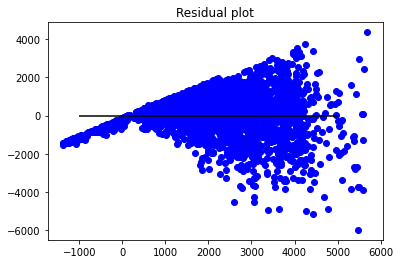

In [117]:
# residual plot
x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,14,3735.1380,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,4,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,14,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.066132,182.0950,OUT010,15,732.3800,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.93,0.066132,53.8614,OUT013,26,994.7052,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


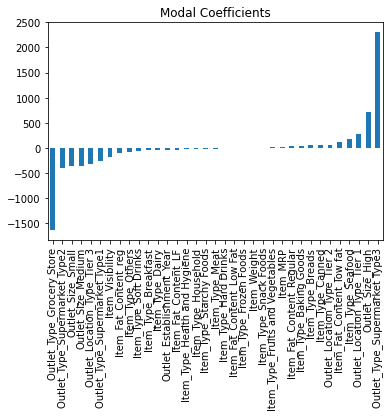

In [118]:
# checking the magnitude of coefficients
predictors = x_train.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
train.head()

We can see that the "Outlet_Type_Grocery_Store" and "outlet_Type_Supermarket_Type3" have very high coefficients so the total sales of an item would be more driven by these two features. To reduce the magnitude of coefficients in our model, we can use regression with regularization

## Ridge Regression

Ridge regression
* Shrinks the parameters, used to prevent multicollinearity
* Reduces the model complexity by coefficient shrinkage
* Uses L2 regularization

MSE: 1299709.3136014526
R-Squared: 0.5592689497210797


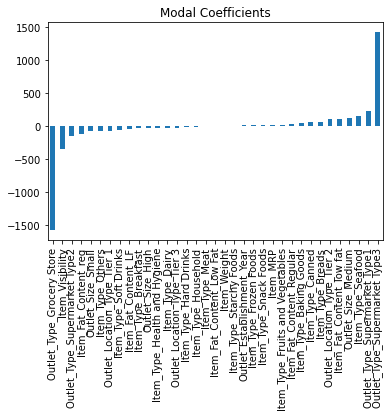

In [124]:
from sklearn.linear_model import Ridge

## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True) # using default alpha
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)

# calculating mse and r-squared
mse = np.mean((pred_cv - y_cv)**2)
print("MSE:", mse) # 1299709
print("R-Squared:", ridgeReg.score(x_cv,y_cv)) # 0.5592

# plot coefficients
predictors = x_train.columns
coef = Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients for alpha = 0.05')

MSE: 1299709.3136014526
R-Squared: 0.5049245949599785


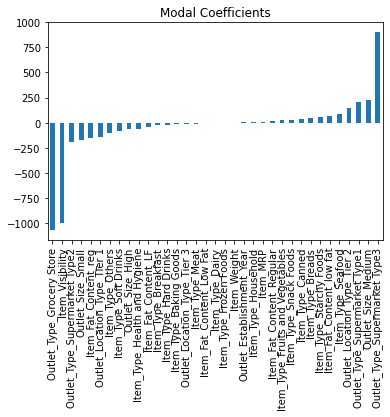

In [125]:
## training the model
ridgeReg = Ridge(alpha=0.5, normalize=True) # using default alpha
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)

# calculating mse and r-squared
mse = np.mean((pred_cv - y_cv)**2)
print("MSE:", mse) # 1299709
print("R-Squared:", ridgeReg.score(x_cv,y_cv)) # 0.5592

# plot coefficients
predictors = x_train.columns
coef = Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients for alpha = 0.5')

MSE: 1299709.3136014526
R-Squared: 0.11731864106385993


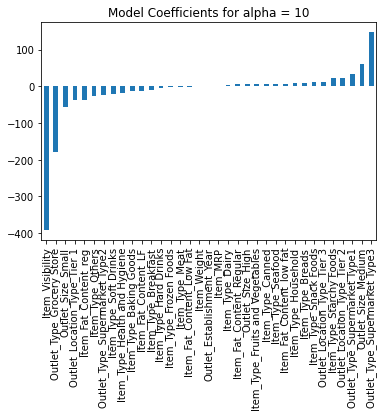

In [128]:
# training the model
ridgeReg = Ridge(alpha=10, normalize=True) # using default alpha
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)

# calculating mse and rsquared
mse = np.mean((pred_cv - y_cv)**2)
print("MSE:", mse) # 1299709
print("R-Squared:", ridgeReg.score(x_cv,y_cv)) # 0.5592

# plot coefficients
predictors = x_train.columns
coef = Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients for alpha = 10')

With increasing alpha, the magnitude of the coefficients decreases. But R-Squared gets bad too.

## Lasso Regression

Lasso regression
* Uses L1 regularization
* Automatically does feature selection

MSE: 1299709.3136014526
R-Squared 0.5610025703903689


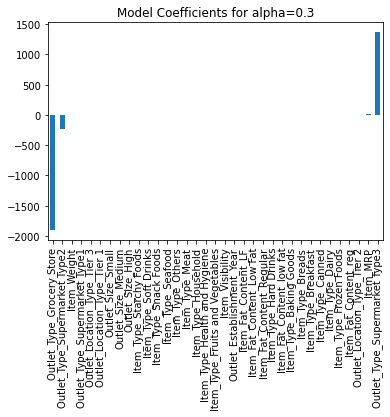

In [129]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_cv)

# calculating mse and r-squared
mse = np.mean((pred_cv - y_cv)**2)
print("MSE:", mse)  # 1299709
print("R-Squared", lassoReg.score(x_cv,y_cv)) # 0.56

# plot coefficients
predictors = x_train.columns
coef = Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients for alpha=0.3')

MSE: 1299709.3136014526
R-Squared 0.5092437311842621


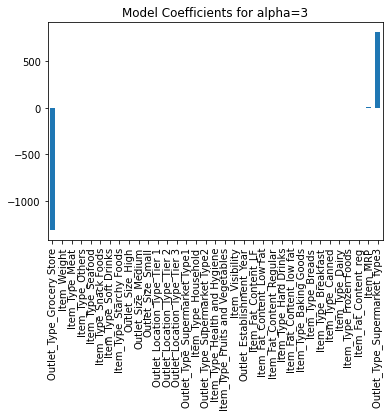

In [131]:
lassoReg = Lasso(alpha=3, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_cv)

# calculating mse and r-squared
mse = np.mean((pred_cv - y_cv)**2)
print("MSE:", mse)  # 1299709
print("R-Squared", lassoReg.score(x_cv,y_cv)) # 0.56

# plot coefficients
predictors = x_train.columns
coef = Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients for alpha=3')

Similarly, the magnitude of coefficients have reduced a lot. However, even with small alphas, except for two all other coefficients are reduced to zero. This is used for feature selection. 

## Elastic Net Regression

Elastic Net
* Generally works better with a large set of features
* Combination of L1 and L2

In [132]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)
pred_cv = ENreg.predict(x_cv)

# calculating mse
mse = np.mean((pred_cv - y_cv)**2)
print("MSE:", mse) # 1618838
print("R-Squared:", ENreg.score(x_cv,y_cv)) # 0.452

MSE: 1618838.4664696276
R-Squared: 0.4519464542577298
